<a href="https://colab.research.google.com/github/spacemancathy/ML-for-sci-data/blob/main/tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

Данные: посещаемость англоязычного портала ITMO.NEWS за 2022, включая популярные страницы, географию, возраст аудитории, пол

In [13]:
path = '/content/drive/MyDrive/ML for data processing/news.itmoEN.xlsx'
data = pd.read_excel(path, index_col='Unnamed: 0')

In [14]:
data.head()

,Story title,Country,Views,Visitors
0,What Can You Buy with 100 Rubles in St. Peters...,США,4306,3967
1,Education in Your Pocket: Ten Telegram Bots To...,Индия,3628,2929
2,Why is Quantum Physics so Hard to Understand?,США,3392,2950
3,What Can You Buy with 100 Rubles in St. Peters...,Великобритания,2276,2062
4,10 Free Live Quiz Tools for the Classroom,США,1944,1765


In [16]:
data.columns

Index(['Story title', 'Country', 'Views', 'Visitors'], dtype='object')

In [17]:
data.dtypes

Story title    object
Country        object
Views           int64
Visitors        int64
dtype: object

In [18]:
data.isna().sum()

Story title    0
Country        0
Views          0
Visitors       0
dtype: int64

In [20]:
num_cols = data.select_dtypes(exclude = 'object')
num_cols.shape

(2006, 2)

In [22]:
num_cols.describe()

,Views,Visitors
count,2006.000000,2006.000000
mean,51.552343,42.124128
std,187.723612,162.227263
min,10.000000,10.000000
25%,15.000000,12.000000
50%,21.000000,17.000000
75%,38.000000,29.000000
max,4306.000000,3967.000000


In [23]:
cat_cols = data.select_dtypes(include = 'object')
cat_cols.shape

(2006, 2)

In [24]:
cat_cols.describe()

,Story title,Country
count,2006,2006
unique,547,83
top,What Can You Buy with 100 Rubles in St. Peters...,Россия
freq,86,666


In [27]:
if 1:
  le = LabelEncoder()
  for c in cat_cols.columns:
    data[c] = le.fit_transform(cat_cols[c])
  data.head()

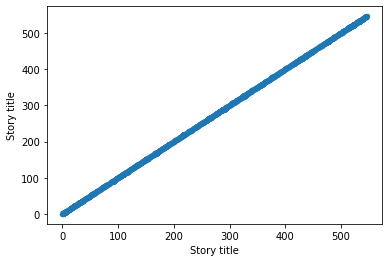

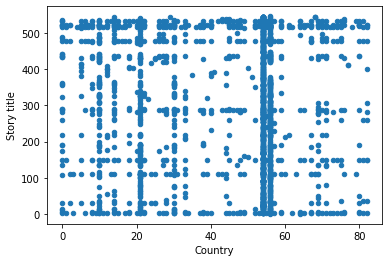

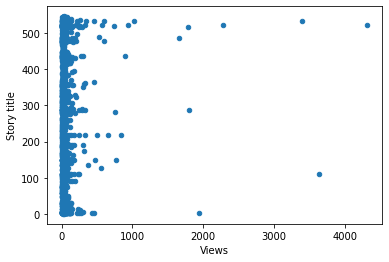

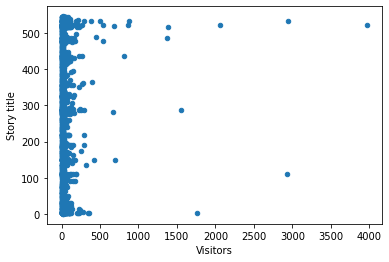

In [38]:
for idx, feature in enumerate(data.columns):
    data.plot(feature, "Story title", subplots=True, kind="scatter") 